<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%A6%9D%EA%B0%95%2C_npz%2C_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EC%83%9D%EC%84%B1(%ED%95%91%EA%B5%AC%2C%EB%BD%80%EB%A1%9C%EB%A1%9C%2C%ED%8E%AD%EC%88%98_%EA%B5%AC%EB%B3%84%ED%95%98%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/인공지능실습/한경/미션

/content/drive/MyDrive/인공지능실습/한경/미션


In [ ]:
#1. 이미지 크롤링 (카테고리 최소 3개로) -->colab에서는 이거 안함. 주피터에서 진행함. 

In [ ]:
#colab에서 셀레니움 사용할때 기본 설정
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 27.5MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ 

In [ ]:
from bs4 import BeautifulSoup as bs
import time
import os
import urllib.request
from urllib.parse import quote_plus

In [ ]:
#이미지 크롤링하고 폴더 새로 만들어서 거기에 이미지 넣기
# 참고사이트: https://ai-run.tistory.com/47
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
import os
import urllib.request
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys

def naver_img(Keyword, count_down):
    # 네이버 이미지 검색 및 저장 함수
    url='https://search.naver.com/search.naver?where=image&sm=tab_jum&query='+Keyword

    #colab용 Selenium 설정
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
    
    driver.get(url)
    time.sleep(3)

    body = driver.find_element_by_css_selector('body')

    # 페이지 다운시켜서 더 많은 이미지가 나오게 한다
    for i in range(20):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(1)

        html = driver.page_source
        soup = bs(html, 'html.parser')
        img = soup.find_all(class_='_img')

        img_url_lst=[]
        tag_img = soup.find_all("img")

    for url_num in tag_img:
        try:
            img_url_lst.append(url_num['src'])
        except:
            pass


    #### 이미지 저장 기본 디렉토리 확인 및 생성 
    if not os.path.exists('/content/drive/My Drive/인공지능실습/한경/미션/images/'):
        os.makedirs('/content/drive/My Drive/인공지능실습/한경/미션/images/')
        fdir='/content/drive/My Drive/인공지능실습/한경/미션/images/'
    else:
        fdir = '/content/drive/My Drive/인공지능실습/한경/미션/images/'

    #### 검색어에 해당하는 디렉토리가 존재하는지 확인(직접 코딩하세요)
    ## 1. 없는 경우 저장을 위해 디렉토리 생성
    ## 2. 있는 경우 폴더 뒤에 '1'을 추가로 붙여 새로운 폴더 생성

    if not os.path.exists(fdir+Keyword):   # 키워드 폴더가 없다면 생성
        os.makedirs(fdir+Keyword+'/')
        fdir=fdir+Keyword+'/'
    else:
        # 키워드 폴더가 있다면 새로운 폴더 생성(없는 폴더 생성까지 무한 반복)
        i=0
        while True:
            i+=1
            if not os.path.exists(fdir+Keyword+str(i)):
                os.makedirs(fdir+Keyword+str(i)+'/')
                fdir=fdir+Keyword+str(i)+'/'
                break

    ##### 이미지 저장하기  #####################
    i=1
    for img_u in img_url_lst:
        img_name=fdir+Keyword+str(i)+'.jpg'     # 파일명 생성
        urllib.request.urlretrieve(img_u, img_name)  # 이미지 url에서 데이터 다운로드 받아 폴더에 저장
        i+=1

    driver.close()
    print('이미지 검색을 완료하였습니다.')


if __name__=='__main__':
    Keyword = input("검색어를 입력하세요: ")
    count_down = int(input("스크롤 다운 횟수를 입력해 주세요(최대6): "))
    naver_img(Keyword, count_down)


검색어를 입력하세요: 펭수
스크롤 다운 횟수를 입력해 주세요(최대6): 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


이미지 검색을 완료하였습니다.


In [3]:
#현재 핑구, 핑가, 루피 폴더에 각각 다음과 같이 사진을 넣었음
import os
핑구_dir='/content/drive/My Drive/인공지능실습/한경/미션/images/핑구'
뽀로로_dir='/content/drive/My Drive/인공지능실습/한경/미션/images/뽀로로'
펭수_dir='/content/drive/My Drive/인공지능실습/한경/미션/images/펭수'
print('핑구 사진 개수: ', len(os.listdir(핑구_dir)))
print('뽀로로 사진 개수: ', len(os.listdir(뽀로로_dir)))
print('펭수 사진 개수: ', len(os.listdir(펭수_dir)))

핑구 사진 개수:  181
뽀로로 사진 개수:  154
펭수 사진 개수:  180


In [ ]:
#중복 사진(이름 같거나, 용량이 같은 거(42바이트 이런거)) 삭제하기
#https://mizykk.tistory.com/55
#지금은 어려우니 패스하겠음..ㅠ.ㅠ

In [4]:
# #2.폴더 정리(train, test로 나누어 수동으로 정리..)
## 방법1 아래의 코드를 이용해서 기존 폴더에서 새 폴더로 옮기기.. 
# import os # miscellaneous operating system interfaces
# import shutil # high-level file operations
## 출처: https://rfriend.tistory.com/431 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
##나는 그냥 수동으로 함... 
train_핑구='/content/drive/My Drive/인공지능실습/한경/미션/images/train/핑구'
test_핑구='/content/drive/My Drive/인공지능실습/한경/미션/images/test/핑구'

train_뽀로로='/content/drive/My Drive/인공지능실습/한경/미션/images/train/뽀로로'
test_뽀로로='/content/drive/My Drive/인공지능실습/한경/미션/images/test/뽀로로'

train_펭수='/content/drive/My Drive/인공지능실습/한경/미션/images/train/펭수'
test_펭수='/content/drive/My Drive/인공지능실습/한경/미션/images/test/펭수'
print('핑구 train data 개수: ', len(os.listdir(train_핑구)))
print('핑구 test data 개수: ', len(os.listdir(test_핑구)))
print('뽀로로 train data 개수: ', len(os.listdir(train_뽀로로)))
print('뽀로로 test data 개수: ', len(os.listdir(test_뽀로로)))
print('펭수 train data 개수: ', len(os.listdir(train_펭수)))
print('펭수 test data 개수: ', len(os.listdir(test_펭수)))

핑구 train data 개수:  160
핑구 test data 개수:  39
뽀로로 train data 개수:  112
뽀로로 test data 개수:  39
펭수 train data 개수:  139
펭수 test data 개수:  39


In [ ]:
#3 이미지 증강
# 데이터 증강( 이미지 증강, data augmetation)
- 이미지 인공지능 딥러닝 모델을 만들때 이미지 데이터를 수집하여 CNN을 거쳐 훈련을 시키는 것을 함. 
- 이때 이미지 데이터의 수는 인식률을 높히기 위해선 객체당 수백장에서  수천, 수만장까지 필요.
- 그러나 이미지의 수에 비례하여 인식률이 높아지는 것은 아님. 
- 원본 이미지를 좌우 반전, 상하 반전, 왜곡시키며 이미지의 경우의 수를 늘리는 augmentation이 유용함. 
- https://btw-e-m.tistory.com/8

In [6]:
!pip install Augmentor

In [12]:
import Augmentor

## 증강 시킬 이미지 폴더 경로
img = Augmentor.Pipeline("/content/drive/My Drive/인공지능실습/한경/미션/images/train/핑구")

## 좌우 반전
img.flip_left_right(probability=1.0)

## 상하 반전
img.flip_top_bottom(probability=1.0)

## 왜곡
img.random_distortion(probability=1, grid_width=10, grid_height=10, magnitude=8)

## 증강 이미지 수
img.sample(10)


Processing <PIL.Image.Image image mode=RGB size=340x506 at 0x7F0232C7F9D0>:  30%|███       | 3/10 [00:00<00:00,  9.14 Samples/s]

Initialised with 160 image(s) found.
Output directory set to /content/drive/My Drive/인공지능실습/한경/미션/images/train/핑구/output.

Processing <PIL.Image.Image image mode=RGB size=340x255 at 0x7F0232C74F50>: 100%|██████████| 10/10 [00:00<00:00, 44.30 Samples/s]


In [20]:
#4. 특정 이미지 배열만 골라 작업( , , 3 )인 것만 고르기. shape 제작
#5. ylabel 값 추가해서 shape 제작
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
X_train=[]; Y_train=[]
작업폴더='/content/drive/My Drive/인공지능실습/한경/미션/images/train/펭수/'

fileList=os.listdir(작업폴더)
for item in fileList:
    img= Image.open(작업폴더 + item)

    imgRe=img.resize((50,50))
    imgArr=np.array(imgRe)/255
    
    if np.shape(imgArr) == (50,50,3):
        X_train.append(imgArr)
        Y_train.append(2)

작업폴더='/content/drive/My Drive/인공지능실습/한경/미션/images/train/뽀로로/'

fileList=os.listdir(작업폴더)
for item in fileList:
    img= Image.open(작업폴더 + item)

    imgRe=img.resize((50,50))
    imgArr=np.array(imgRe)/255
    
    if np.shape(imgArr) == (50,50,3):
        X_train.append(imgArr)
        Y_train.append(1)

작업폴더='/content/drive/My Drive/인공지능실습/한경/미션/images/train/핑구/'

fileList=os.listdir(작업폴더)
for item in fileList:
    img= Image.open(작업폴더 + item)

    imgRe=img.resize((50,50))
    imgArr=np.array(imgRe)/255
    
    if np.shape(imgArr) == (50,50,3):
        X_train.append(imgArr)
        Y_train.append(0)

In [21]:
print(np.shape(X_train));print(np.shape(Y_train))

(441, 50, 50, 3)
(441,)


In [22]:
Y_train

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


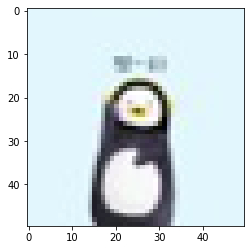

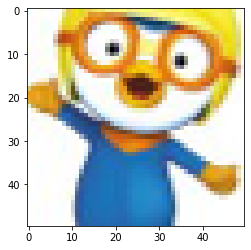

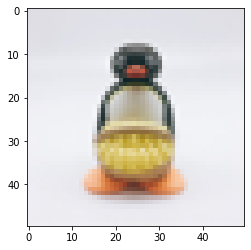

In [27]:
plt.imshow(X_train[0])
plt.show()

plt.imshow(X_train[150])
plt.show()

plt.imshow(X_train[400])
plt.show()

In [29]:
#5-1 test 셋 제작
#4. 특정 이미지 배열만 골라 작업( , , 3 )인 것만 고르기. shape 제작
#5. ylabel 값 추가해서 shape 제작
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
X_test=[]; Y_test=[]
작업폴더='/content/drive/My Drive/인공지능실습/한경/미션/images/test/펭수/'

fileList=os.listdir(작업폴더)
for item in fileList:
    img= Image.open(작업폴더 + item)

    imgRe=img.resize((50,50))
    imgArr=np.array(imgRe)/255
    
    if np.shape(imgArr) == (50,50,3):
        X_test.append(imgArr)
        Y_test.append(2)

작업폴더='/content/drive/My Drive/인공지능실습/한경/미션/images/test/뽀로로/'

fileList=os.listdir(작업폴더)
for item in fileList:
    img= Image.open(작업폴더 + item)

    imgRe=img.resize((50,50))
    imgArr=np.array(imgRe)/255
    
    if np.shape(imgArr) == (50,50,3):
        X_test.append(imgArr)
        Y_test.append(1)

작업폴더='/content/drive/My Drive/인공지능실습/한경/미션/images/test/핑구/'

fileList=os.listdir(작업폴더)
for item in fileList:
    img= Image.open(작업폴더 + item)

    imgRe=img.resize((50,50))
    imgArr=np.array(imgRe)/255
    
    if np.shape(imgArr) == (50,50,3):
        X_test.append(imgArr)
        Y_test.append(0)

In [30]:
print(np.shape(X_test));print(np.shape(Y_test))

(117, 50, 50, 3)
(117,)


In [31]:
#5-2 y_lable 차원 정리하기. 
#(441,)를 (441,1)로 바꾸기
Y_train_result=np.reshape(Y_train,(-1,1))
print(np.shape(Y_train_result))

#(117,)를 (117,1)로 바꾸기
Y_test_result=np.reshape(Y_test,(-1,1))
print(np.shape(Y_test_result))


(441, 1)
(117, 1)


In [ ]:
#6. npz로 저장
np.savez('/content/drive/My Drive/인공지능실습/한경/미션/핑구뽀로로펭수',
         X_train=X_train, Y_train=Y_train_result, X_test=X_test, Y_test=Y_test_result)


In [33]:
#6-1 저장된 npz 불러와서 확인하기
imgSet=np.load('/content/drive/My Drive/인공지능실습/한경/미션/핑구뽀로로펭수.npz')
list(imgSet)

['X_train', 'Y_train', 'X_test', 'Y_test']

In [34]:
X_train=imgSet['X_train']
Y_train=imgSet['Y_train']
X_test=imgSet['X_test']
Y_test=imgSet['Y_test']

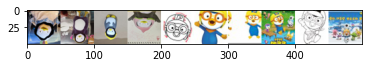

array([[2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [39]:
plt.imshow(np.hstack(X_train[145:155]))
plt.show()
Y_train[145:155]

In [40]:
#7. 모델 생성
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping


In [43]:
#shape 확인
for i in list(imgSet):
  print(np.shape(imgSet[i]))

(441, 50, 50, 3)
(441, 1)
(117, 50, 50, 3)
(117, 1)


In [45]:
## 스케일링 유무를 확인하기 위해서 X_train과 X_test의 max,min 값을 출력 #최댓값이 1.0 최솟값이 0.0인 것으로 보아 스켈링 된듯.2.0은 y값이므로 무시.. 
for i in list(imgSet):
  print(imgSet[i].max(), imgSet[i].min()) 

1.0 0.0
2 0
1.0 0.0
2 0


In [46]:
## Y_train 과 Y_test 값을 원 핫 인코딩 값으로 변경
Y_train_oh=np_utils.to_categorical(Y_train)
Y_test_oh=np_utils.to_categorical(Y_test)


In [47]:
#원핫인코딩 결과 맨 마지막 숫자들이 3으로 같아짐
## X_train, X_test는 반드시 4개의 dim 이어야 함.
print(np.shape(X_train))
print(np.shape(Y_train_oh))
print(np.shape(X_test))
print(np.shape(Y_test_oh))

(441, 50, 50, 3)
(441, 3)
(117, 50, 50, 3)
(117, 3)


In [63]:
## 컨블루션 신경망의 설정
## 모델 성능을 높일 수 있도록 모든 작업을 다 완료한 뒤 다시 튜닝하여 봅니다.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), 
                 input_shape=(50, 50,3), 
                 activation='relu'))               #위에서 확인한 shape의 숫자를 넣기
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))                           #없애거나 이걸 더 추가하거나... W값을 없애는 것이라 함.
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))         #dense: y의 nunique 갯수

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
## 모델 최적화 설정
## 드라이브 마운트하고 해야함
MODEL_DIR = './model_penguin/'         # 모델위치 변경합니다.
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', verbose=1, 
                               save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [65]:
## 모델의 실행
## batch_size: 한번에 처리하는 데이터 크기. 예를 들어 2,000개의 자료가 있을 때, batch_size를 20으로 하면 20개씩 100번
## loss는 에러이기 때문에 작어져야 함.
history = model.fit(X_train, Y_train_oh, validation_data=(X_test, Y_test_oh),
                    epochs=10, batch_size=1, 
                    verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

Epoch 1/10
441/441 [==============================] - 57s 5ms/step - loss: 1.1251 - accuracy: 0.3933 - val_loss: 0.8372 - val_accuracy: 0.6154

Epoch 00001: val_loss improved from inf to 0.83725, saving model to ./model/01-0.8372.hdf5
Epoch 2/10
441/441 [==============================] - 1s 3ms/step - loss: 0.7814 - accuracy: 0.7536 - val_loss: 0.7821 - val_accuracy: 0.7436

Epoch 00002: val_loss improved from 0.83725 to 0.78214, saving model to ./model/02-0.7821.hdf5
Epoch 3/10
441/441 [==============================] - 1s 3ms/step - loss: 0.6008 - accuracy: 0.7803 - val_loss: 0.6599 - val_accuracy: 0.7863

Epoch 00003: val_loss improved from 0.78214 to 0.65985, saving model to ./model/03-0.6599.hdf5
Epoch 4/10
441/441 [==============================] - 2s 4ms/step - loss: 0.3562 - accuracy: 0.8852 - val_loss: 0.6207 - val_accuracy: 0.8034

Epoch 00004: val_loss improved from 0.65985 to 0.62069, saving model to ./model/04-0.6207.hdf5
Epoch 5/10
441/441 [==============================]

4/4 [==============================] - 0s 29ms/step - loss: 1.0459 - accuracy: 0.7863

 Test Accuracy: 0.7863


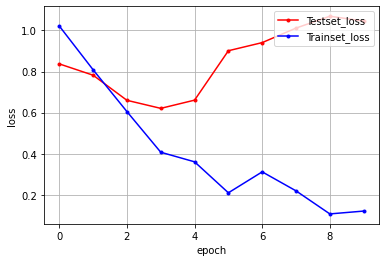

In [67]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test_oh)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

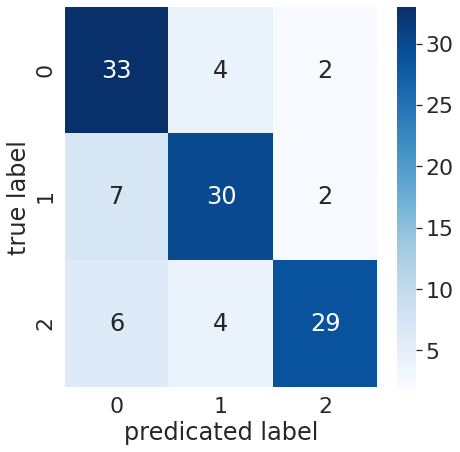

In [69]:
## 혼돈행렬을 이용한 정확도 평가(모델평가)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

results = model.predict(X_test)

#혼돈행렬만들기
plt.figure(figsize=(7,7))
cm=confusion_matrix(np.argmax(Y_test_oh, axis=-1), np.argmax(results, axis=-1))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')

plt.xlabel('predicated label')
plt.ylabel('true label')

plt.show()

(1, 50, 50, 3)
[[0.2911346  0.15600325 0.5528621 ]]
2


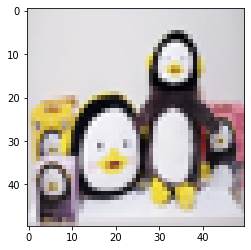

In [56]:
예측=X_test[0:1]
print(np.shape(예측))
y예측값=model.predict(예측) 

print(y예측값)
print(np.argmax(y예측값)) #0은 핑구 1은 뽀로로 2는 펭수

plt.imshow(np.hstack(X_test[0:1]))

2


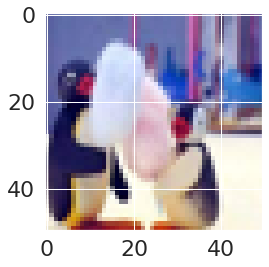

In [70]:
#8. 모델에 새 사진 넣어서 예측
#내가 가져온 사진으로 예측해보기
from PIL import Image
img=Image.open('/content/drive/My Drive/인공지능실습/한경/미션/핑구핑가.jpg')
img=img.resize((50,50))              #이미지 resize
plt.imshow(img)
img=np.array(img)/255                #최댓값이 1.0이 되도록 스케일 조정
img=np.expand_dims(img,0)            #차원확장 함수
print(np.argmax(model.predict(img))) #'펭수'로 예측 ==> 틀렸음 ㅋㅋ!


2


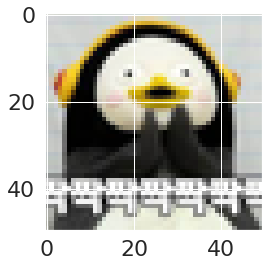

In [71]:
img1=Image.open('/content/drive/My Drive/인공지능실습/한경/미션/펭수짤.jpg')
img1=img1.resize((50,50))              #이미지 resize
plt.imshow(img1)
img1=np.array(img1)/255                #최댓값이 1.0이 되도록 스케일 조정
img1=np.expand_dims(img1,0)            #차원확장 함수
print(np.argmax(model.predict(img1))) #'펭수'로 예측 ==> 맞음!


1


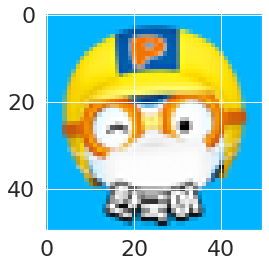

In [74]:
img2=Image.open('/content/drive/My Drive/인공지능실습/한경/미션/마스크뽀로로.jpg')
img2=img2.resize((50,50))              #이미지 resize
plt.imshow(img2)
img2=np.array(img2)/255                #최댓값이 1.0이 되도록 스케일 조정
img2=np.expand_dims(img2,0)            #차원확장 함수
print(np.argmax(model.predict(img2))) #'뽀로로'로 예측 ==> 맞음!


In [72]:
#모델 저장
model.save('펭귄캐릭터구별모델.h5')